In [13]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import helpers
import pandas as pd
from skimage import exposure
from PIL import Image
from scipy import ndimage
from skimage.measure import label, regionprops_table, regionprops
from skimage import util
from skimage import filters
from sklearn.feature_extraction import image
import itertools
from sklearn.model_selection import train_test_split
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [2]:
raw_image = cv2.imread('benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00015.tif', 0)
classified_image = np.load('/media/sda/data/labeled/F20_10b/6um_jamtveit_att_pag-1.99_3.12_00015.tif_labeled.npy')

In [3]:
raw_patches = image.extract_patches_2d(raw_image, patch_size=(25, 25))

In [4]:
index = [i for i in itertools.combinations_with_replacement(np.arange(0, raw_image.shape[0], 1).astype(np.uint8), r=2)]

In [5]:
[i for i in itertools.combinations_with_replacement([1,2,3], r=2)]

[(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]

In [6]:
print(len(index))
raw_image.shape[0]*raw_image.shape[1]

7447870


14891881

In [7]:
xx, yy = np.meshgrid([1,2,3], [1,2,3])
xx.ravel()

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [8]:
footprint1 = np.array(
    [[1, 1, 1]
    ,[1, 0, 1]
    ,[1, 1, 1]]
    )

footprint2 = np.array(
    [[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 0, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]]
    )

In [10]:
train_data = pd.DataFrame()

xx, yy = np.meshgrid(np.arange(0, raw_image.shape[0], 1)
                    ,np.arange(0, raw_image.shape[1], 1))

train_data['x'] = xx.ravel()
train_data['y'] = yy.ravel()

normed_raw_image = raw_image / 255.
# blur = cv2.Gaus

train_data['meijering'] = filters.meijering(normed_raw_image).ravel()
train_data['non_local_mean'] = helpers.zscore(normed_raw_image).ravel()
train_data['laplace_25'] = filters.laplace(normed_raw_image, ksize=25).ravel()
train_data['sato'] = filters.sato(normed_raw_image).ravel()
train_data['sobel'] = filters.sobel(normed_raw_image).ravel()
train_data['median_3'] = filters.median(normed_raw_image, selem=footprint1).ravel()
train_data['maximum_5'] = ndimage.maximum_filter(normed_raw_image, footprint=footprint2, mode='constant').ravel()
train_data['yhat'] = classified_image.ravel()

/home/john/anaconda3/envs/faroe/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  from ipykernel import kernelapp as app


In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]], test_size=0.3, random_state=42)

In [12]:
train_data.yhat.unique()

array([-1.,  1.,  2.,  0.])

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

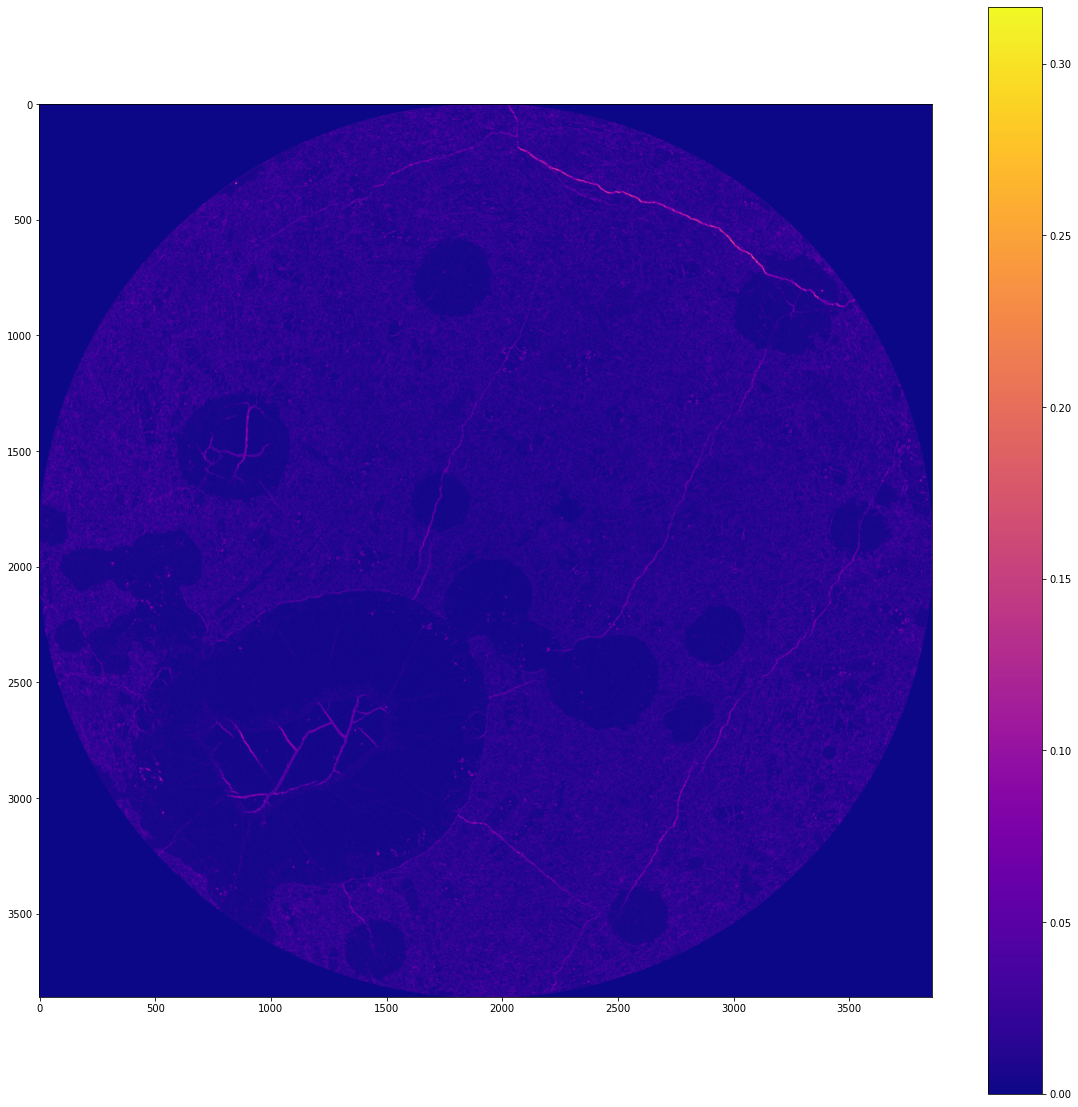

In [87]:
# helpers.plot_image(filters.meijering(raw_image))
# helpers.plot_image(filters.sato(raw_image))
# helpers.plot_image(filters.scharr(normed_raw_image))
helpers.plot_image(filters.sobel(normed_raw_image))

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

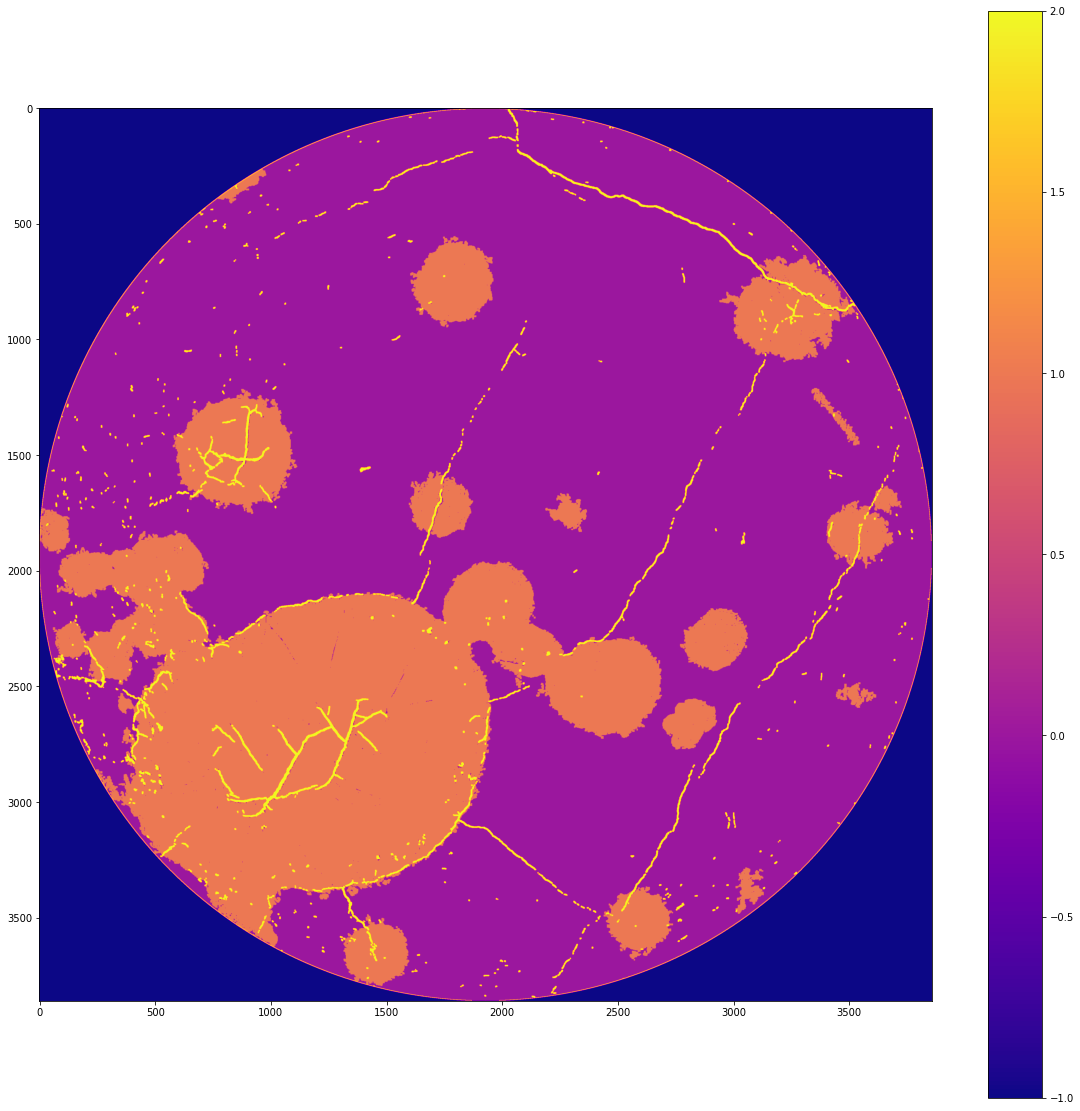

In [21]:
helpers.plot_image(classified_image)